# Neural Network Model for Mental Health Classification

In [2]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [3]:

# 2. Load Data
df = pd.read_csv('clear dataset feature selection.csv')


In [4]:

# 3. Feature Selection and Target
features = ['Vegetables', 'tea Intake (estekan/day)', 'sweets', 'fruits', 'dairy',
            'oils', 'active_transport', 'physical_activity', 'leisure_time(hour / week)', 'illnesses']
target = 'n_93_cluster'

X = df[features].values
y = df[target].values


In [5]:

# 4. Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train.shape

(156, 10)

In [7]:
X_test.shape

(40, 10)

In [15]:

# 6. Build and Compile the Model
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)


In [16]:

# 7. Train the Model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/200
9/9 [==============================] - 1s 17ms/step - loss: 1.0298 - accuracy: 0.5357 - val_loss: 0.9287 - val_accuracy: 0.6250
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.7857 - val_loss: 0.9585 - val_accuracy: 0.6250
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5840 - accuracy: 0.7857 - val_loss: 0.9897 - val_accuracy: 0.6250
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7857 - val_loss: 0.9645 - val_accuracy: 0.6250
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.5009 - accuracy: 0.7857 - val_loss: 0.9434 - val_accuracy: 0.6250
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.8000 - val_loss: 0.9833 - val_accuracy: 0.6250
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8286 - val_loss: 1.0045 - val_accuracy: 0.6250
Epoch 8/200
9/9 [=========

2/2 [==============================] - 0s 2ms/step


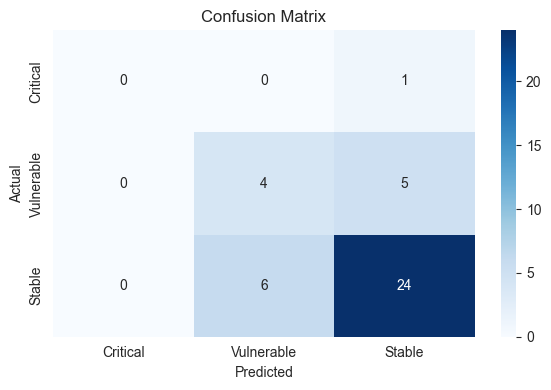

              precision    recall  f1-score   support

    Critical       0.00      0.00      0.00         1
  Vulnerable       0.40      0.44      0.42         9
      Stable       0.80      0.80      0.80        30

    accuracy                           0.70        40
   macro avg       0.40      0.41      0.41        40
weighted avg       0.69      0.70      0.69        40



C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [17]:

# 8. Evaluation and Visualization
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Critical', 'Vulnerable', 'Stable']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=labels))


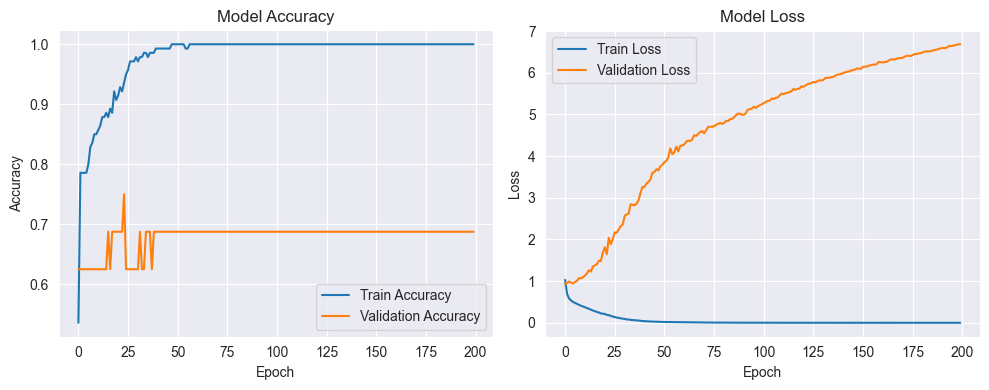

In [18]:

# Accuracy and Loss Plot
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()
